In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [8]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift()

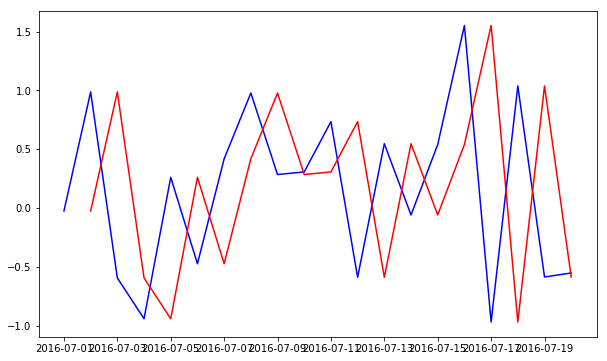

In [9]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

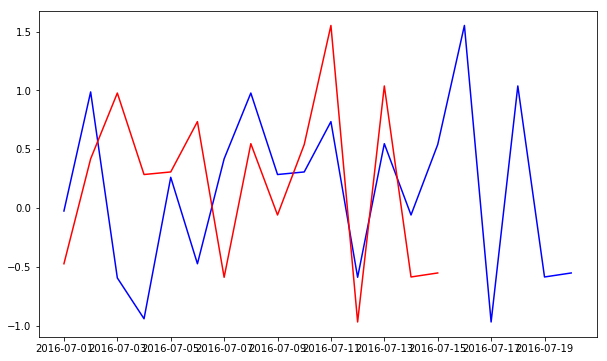

In [10]:
# %load snippets/shift_future.py
#ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift(-5)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

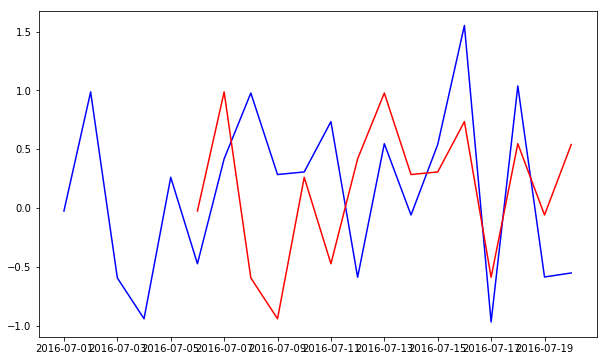

In [11]:
#ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift(5)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [12]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

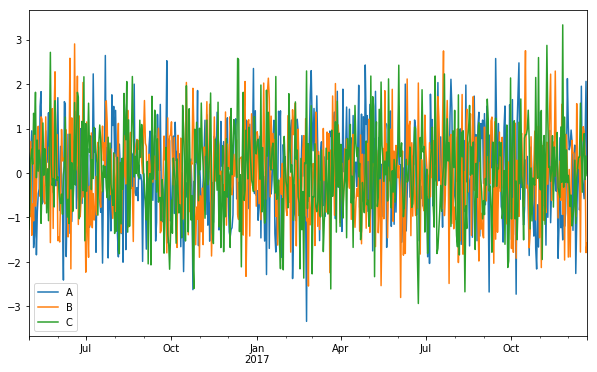

In [16]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])
df.plot()


In [17]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

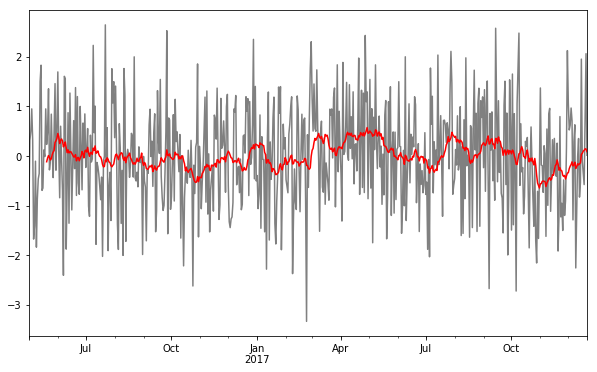

In [18]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

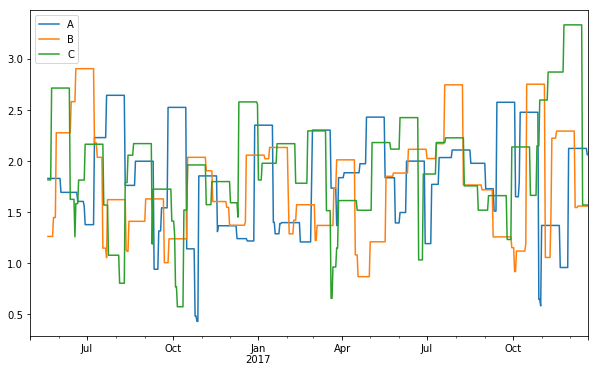

In [25]:
r.max().plot()

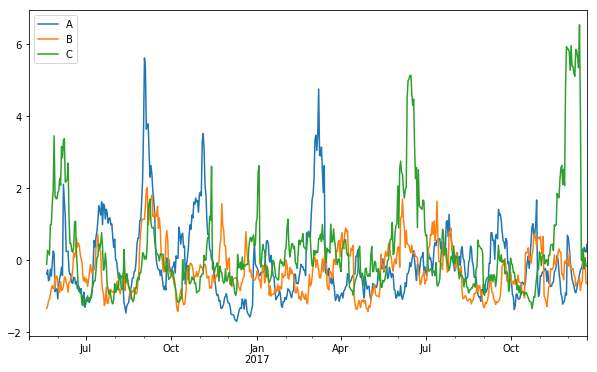

In [26]:
r.kurt().plot()

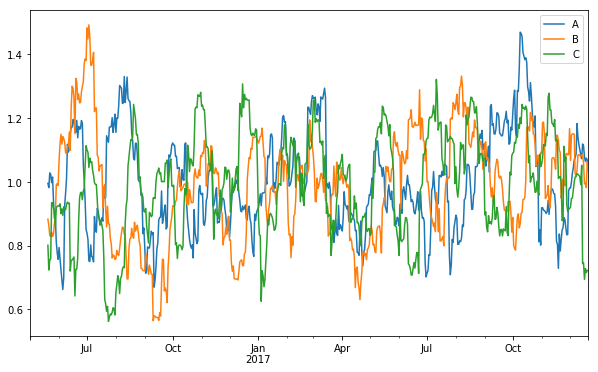

In [27]:
r.std().plot()

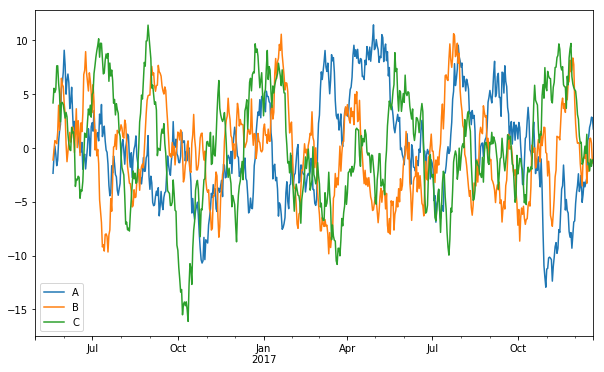

In [29]:
r.sum().plot()

### What about a custom function?

In [33]:
# %load snippets/custom_rolling.py
df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[1:10]


,A,B,C
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,0.640763,-1.382516,-2.124146


In [34]:
df.rolling(window = 10, center = False).apply(lambda x: x[1] - x[-1])


,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,1.188662,-1.443101,-1.427263


### What if I want to generate a rolling window function of monthly data from daily data?

2016-07-01   -1.657323
2016-07-02   -0.101477
2016-07-03   -0.715400
2016-07-04    0.263917
2016-07-05    2.404124
Freq: D, dtype: float64

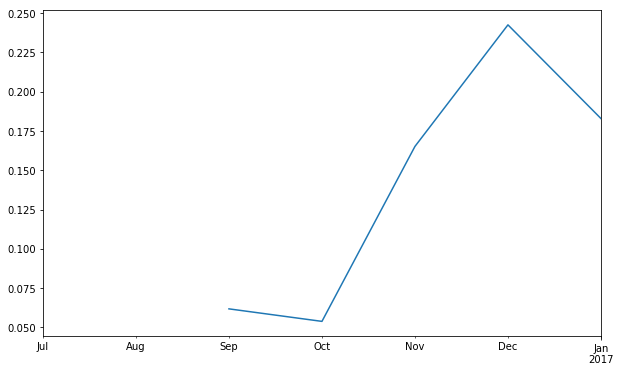

In [38]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().rolling(window = 3).mean().plot()
ts_long.head()

## Expanding windows

In [39]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,-0.336723,-0.918296,-0.975765
2016-05-03,-0.060498,-0.375328,-0.542529
2016-05-04,0.191783,-0.631862,-0.271923
2016-05-05,0.218913,-0.644606,-0.177836


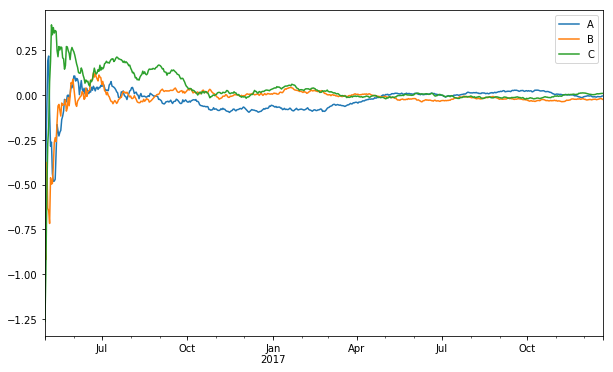

In [40]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

In [ ]:
# %load snippets/window_funcs_try.py
#1
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()

#2 
# To get a more reliable statistic if it makes logical sense

#3
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

#4
r = df.rolling(window = 20)
r.agg(['sum', 'count']).head()

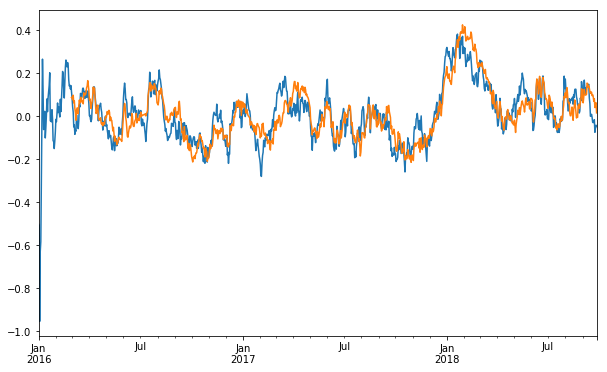

In [42]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()

In [43]:
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,NaN,NaN,NaN


In [44]:
r = df.rolling(window = 20)
r.agg(['sum', 'count']).head()

A         B         C      
           sum count sum count sum count
2016-05-01 NaN   1.0 NaN   1.0 NaN   1.0
2016-05-02 NaN   2.0 NaN   2.0 NaN   2.0
2016-05-03 NaN   3.0 NaN   3.0 NaN   3.0
2016-05-04 NaN   4.0 NaN   4.0 NaN   4.0
2016-05-05 NaN   5.0 NaN   5.0 NaN   5.0